# Lista 2

## Uczenie maszynowe i sztuczna inteligencja

* [Naiwny klasyfikator bayesowski](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) oraz [Naiwny wielomianowy klasyfikator bayesowski](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Multinomial_naive_Bayes)
* [Tokenizacja](https://en.wikipedia.org/wiki/Lexical_analysis#Tokenization)
* [Multizbiór słów](https://en.wikipedia.org/wiki/Bag-of-words_model)
* [N-gram](https://en.wikipedia.org/wiki/N-gram), [Bigram](https://en.wikipedia.org/wiki/Bigram), [Trigram](https://en.wikipedia.org/wiki/Trigram)

## Wprowadzenie 

Spamowanie jest jednym z najprostszych ataków w przesyłaniu wiadomości e-mail. Użytkownicy często otrzymują irytujące wiadomości spamowe oraz złośliwe wiadomości phishingowe, subskrybując różne strony internetowe, produkty, usługi, katalogi, biuletyny informacyjne oraz inne rodzaje komunikacji elektronicznej. W niektórych przypadkach, spamowe wiadomości e-mail są generowane przez wirusy lub konie trojańskie rozsyłane masowo.

Istnieje wiele rozwiązań do filtrowania spamu, takich jak techniki filtrowania na czarnej i białej liście, podejścia oparte na drzewach decyzyjnych, podejścia oparte na adresach e-mail oraz metody oparte na uczeniu maszynowym. Większość z nich opiera się głównie na analizie tekstu zawartości e-maila. W rezultacie rośnie zapotrzebowanie na skuteczne filtry antyspamowe, które automatycznie identyfikują i usuwają wiadomości spamowe lub ostrzegają użytkowników przed możliwymi wiadomościami spamowymi. Jednak spamerzy zawsze badają luki istniejących technik filtrowania spamu i wprowadzają nowy projekt do rozprzestrzeniania spamu w szerokim zakresie np. atak tokenizacji czasami wprowadza w błąd filtry antyspamowe, dodając dodatkowe spacje. Dlatego też treści e-maili muszą być strukturalizowane. Ponadto, pomimo posiadania najwyższej dokładności w wykrywaniu spamu za pomocą uczenia maszynowego, fałszywe pozytywy (False Positive, FP) stanowią problem z powodu jednorazowego wykrywania zagrożeń e-mailowych. Aby zaradzić problemom z fałszywymi pozytywami oraz zmianom w różnych projektach ataków, z tekstu usuwane są słowa kluczowe oraz inne niepożądane informacje przed dalszą analizą. Po wstępnym przetwarzaniu, te teksty przechodzą przez liczne metody ekstrakcji cech, takie jak word2vec, word n-gram, character n-gram oraz kombinacje n-gramów o zmiennych długościach. Różne techniki uczenia maszynowego, takie jak support vector machine (SVM), decision tree (DT), logistic regression (LR) oraz multinomial naıve bayes (MNB), są stosowany aby dokonać klasyfikacji e-maili.

Na tej liste skoncentrujemy się tylko na metodzie naiwnego klasyfikatora bayesowskiego przedstawionego na wykładzie wraz z wersją [wielomianową](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Multinomial_naive_Bayes).

#### **Uwaga**

**Wszystkie implementacje klasyfikatorów należy napisać samemu. Na tej liście nie korzystamy z implementacji klasyfikatorów istniejących w popularnych bibliotekach.**


# Klasyfikatory Naiwnego Bayesa (NB)

W naszych eksperymentach po wstępnym przetworzeniu każda wiadomość jest ostatecznie reprezentowana jako wektor $\mathbf{x}=(x_1, \ldots , x_m)$, gdzie $x_1, \ldots , x_m$ są wartościami atrybutów $X_1, \ldots , X_m$ , a każdy atrybut dostarcza informacje o określonym tokenie wiadomości. W najprostszym przypadku wszystkie atrybuty są wartościami boolowskimi: $X_i = 1$, jeśli wiadomość zawiera dany token; w przeciwnym razie, $X_i = 0$. Alternatywnie, ich wartości mogą być częstotliwościami tokenów (TF), pokazującymi, ile razy odpowiadający token występuje w wiadomości. Atrybuty z wartościami TF przenoszą więcej informacji niż atrybuty boolowskie.

Z twierdzenia Bayesa wynika, że prawdopodobieństwo, że wiadomość o wektorze $\mathbf{x} = (x_1, \ldots, x_m)$ należy do kategorii $c$, wynosi: 

$$
p(c | \mathbf{x}) = \frac{p(c) \cdot p(\mathbf{x} | c)}{p(\mathbf{x})}
$$

Ponieważ mianownik nie zależy od kategorii, klasyfikator NB klasyfikuje każdą wiadomość do kategorii, która maksymalizuje $p(c) \cdot p(\mathbf{x} | c)$. W przypadku filtrowania spamu oznacza to klasyfikowanie wiadomości jako spamu, gdy: 

$$
\frac{p(c_s) \cdot p(\mathbf{x} | c_s)}{p(c_s) \cdot p(\mathbf{x} | c_s) + p(c_h) \cdot p(\mathbf{x} | c_h)} > T
$$

gdzie $T = 0.5$, a $c_h$ i $c_s$ oznaczają kategorie ham i spam. Zmieniając $T$, można zdecydować się na więcej prawdziwych negatywów (poprawnie sklasyfikowane wiadomości ham) kosztem mniej prawdziwych pozytywów (poprawnie sklasyfikowane wiadomości spam), lub odwrotnie. Prawdopodobieństwa a priori $p(c)$ są zwykle szacowane przez podzielenie liczby treningowych wiadomości kategorii $c$ przez łączną liczbę treningowych wiadomości. Prawdopodobieństwa $p(\mathbf{x} | c)$ są szacowane w różny sposób w każdej wersji NB - patrz wykład.

# Naiwny klasyfikator bayesowski wielomianowy (MNB)

Klasyfikator [wielomianowy](https://en.wikipedia.org/wiki/Multinomial_distribution) bayesowski z atrybutami TF traktuje każdą wiadomość $d$ jako [multizbiór]((https://en.wikipedia.org/wiki/Bag-of-words_model)) tokenów, zawierający każdy token $t_i$ tyle razy, ile występuje w $d$. Dlatego $d$ można przedstawić jako $\mathbf{x} = (x_1, ..., x_m)$, gdzie każde $x_i$ to teraz liczba wystąpień $t_i$ w $d$. Ponadto, każda wiadomość $d$ z kategorii $c$ jest postrzegana jako wynik niezależnego wyboru $|d|$ tokenów z $F=\{t_1,\ldots,t_m\}$ z powtórzeniami, z prawdopodobieństwem $p(t_i | c)$ dla każdego $t_i$. Wówczas $p(\mathbf{x} | c)$ jest rozkładem wielomianowym:

$$
p(\mathbf{x} \mid c) = p(|d|) \cdot |d|! \cdot \prod_{i=1}^{d} \frac{p(t_i \mid c)^{x_i}}{x_i !}
$$

gdzie zakładamy, że $|d|$ nie zależy od kategorii $c$. Jest to dodatkowe uproszczające założenie, które jest bardziej dyskusyjne w filtrowaniu spamu. Na przykład, prawdopodobieństwo otrzymania bardzo długiej wiadomości spamowej wydaje się mniejsze niż prawdopodobieństwo otrzymania równie długiej wiadomości ham. Kryterium klasyfikacji wiadomości jako spamu staje się:

$$
\frac{p(c_s) \cdot \prod_{i=1}^{m} p(t_i \mid c_s)^{x_i}}{p(c_s)\cdot\prod_{i=1}^{m} p(t_i \mid c_s)^{x_i} + p(c_h)\cdot\prod_{i=1}^{m} p(t_i \mid c_h)^{x_i}}  > T
$$

gdzie każde $p(t_i | c)$ jest szacowane jako:

$$
p(t \mid c) = \frac{\alpha + N_{t,c}}{\alpha \cdot m + N_c}
$$
gdzie $N_{t,c}$ to liczba wystąpień tokena $t$ w treningowych wiadomościach kategorii $c$, podczas gdy $N_c = \sum_{i=1}^{m} N_{t_i,c}$ to łączna liczba wiadomości treningowych kategorii $c$. W praktyce dodaje się jeszcze parametr $\alpha$ który reprezentuje wygładzenie (smoothing) i rozwiązuje problem zerowego prawdopodobieństwa, patrz [http://www.paulgraham.com/spam.html](http://www.paulgraham.com/spam.html) (np. $\alpha=1$).


### Przykładowe dane wielomianowe

Zatem każda wiadomość $d$  składa się z różnych tokenów $t_i$, a każde z tych $t_i$ należy do słownika $\mathcal{V}$. Jeśli $\mathcal{V}$ zawiera np. $8$ tokenów, $t_1,t_2,...,t_8$, a wiadomość to: $t_1 t_2 t_2 t_6 t_3 t_2 t_8$, reprezentacja tej wiadomości będzie następująca:

| |$t_1$|$t_2$|$t_3$|$t_4$|$t_5$|$t_6$|$t_7$|$t_8$|
|---|---|---|---|---|---|---|---|---|
|$\mathbf{x}$| 1|3 |1 | 0| 0|1 | 0|1 |

Po dodaniu kilku innych losowych wiadomości, zbiór danych wygląda tak:

|$t_1$|$t_2$|$t_3$|$t_4$|$t_5$|$t_6$|$t_7$|$t_8$|$c$|
|---|---|---|---|---|---|---|---|---|
| 1|3 |1 | 0| 0|1 | 0|1 | spam|
| 1|0 |0 | 0| 1|1 | 1|3 | ham|
| 0|0 |0 | 0| 0|2 | 1|2 | spam|

Przyjmując klasy ($1$-spam,$0$-ham) mamy $c = [1,0,1]$. Teraz, porównując z równaniem powyżej,

- $N_{t_i,c}$ to liczba wystąpień cechy $t_i$ w każdej unikalnej klasie $c$. Na przykład, dla $c=1$, $N_{t_1,c}=1, N_{t_6,c}=3$
- $N_c$ to całkowita liczba wystąpień wszystkich cech w każdej unikalnej klasie $c$. Na przykład, dla $c=1$, $N_c=12$
- $m=8$ to całkowita liczba cech
- $\alpha=1$ jest znany jako parametr wygładzania. Jest on potrzebny do problemu zerowego prawdopodobieństwa (patrz [http://www.paulgraham.com/spam.html](http://www.paulgraham.com/spam.html))

# Niedomiar zmiennoprzecinkowy (floating point underflow)

Aby uniknąć problemu niedomiaru zmiennoprzecinkowego, mnożenie zbioru małych prawdopodobieństw, czyli po prostu iloczyn stanie się zbyt mały, aby go reprezentować i zostanie zastąpiony przez 0. Zamiast obliczać
$$
P(c) \prod_{i=1}^m P(t_i | c)
$$
co może spowodować niedomiar, rozważmy obliczenie logarytmu tego wyrażenia,
$$
\log\left(P(c) \prod_{i=1}^m P(t_i | c)\right)
$$
co równoważnie można zapisać jako
$$
\log(P(c))+ \sum_{i=1}^m \log(P(t_i | c))
$$
Następnie zauważ, że jeśli
$$
\log(P(c_s))+ \sum_{i=1}^m \log(P(t_i | c_s)) > \log(P(c_h))+ \sum_{i=1}^m \log(P(t_i | c_h))
$$
wtedy, ponieważ $\log(x) > \log(y)$ iff $x > y$, to
$$
P(c_s) \prod_{i=1}^m P(t_i | c_s) > P(c_h) \prod_{i=1}^m P(t_i | c_h)
$$


## Zadanie 1 (10pt)

### Klasyfikator oparty na algorytmie NB

#### Cel:
Zbudować prosty klasyfikator spamu oparty na NB, który będzie w stanie wykryć i odfiltrować niechciane wiadomości e-mail.

#### Opis:
1. Zbierz zbiór danych zawierający etykiety (spam/nie-spam) oraz treść wiadomości e-mail np. [Enron-Spam](http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/index.html) lub [SMS Spam Collection](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) lub [E-mail Spam](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv) lub ...
2. Przygotuj dane poprzez tokenizację słów i usuń zbędne znaki interpunkcyjne.
3. Zaimplementuj NB, który będzie w stanie klasyfikować wiadomości jako spam lub nie-spam na podstawie występujących słów.
4. Podziel dane na zbiór treningowy i testowy (np. 70% do treningu, 30% do testu).
5. Wytrenuj klasyfikator NB na danych treningowych.
6. Przetestuj klasyfikator na danych testowych i oceniaj jego skuteczność przy użyciu metryk: [precision i recall](https://en.wikipedia.org/wiki/Precision_and_recall), [f1-score](https://en.wikipedia.org/wiki/F-score) oraz [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision).
7. Dokonaj analizy wyników i przedstaw wnioski.



In [130]:
import pandas as pd
import re
import numpy as np
import matplotlib.pylab as plt

sms_df = pd.read_csv('sms+spam+collection/SMSSpamCollection', delimiter='\t', names=['label', 'text'])
sms_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [131]:
def prepare_text(df):
    text = df['text'].values
    lower_text = list(map(lambda x: x.lower(), text))
    clean_text = list(map(lambda x: re.sub("[^a-z]+", " ", x), lower_text))
    return df.assign(text=clean_text)

def get_tokens(df):
    text = df['text'].values
    return list(set(' '.join(text).split()))

sms_df = prepare_text(sms_df)
get_tokens(sms_df)[:10]

['ordered',
 'cooking',
 'ass',
 'drivin',
 'club',
 'toss',
 'arguments',
 'tr',
 'wrongly',
 'fm']

In [132]:
class NaiveBayes:
    def __init__(self):
        self.class_probs = {}
        self.cond_probs = {}

    def train(self, df):
        for token in get_tokens(df):
            ham_count = sum(df['label'] == 'ham')
            spam_count = sum(df['label'] == 'spam')
            self.class_probs = { 
                'ham': ham_count / len(df),
                'spam': spam_count / len(df)
            }
            self.cond_probs[token] = {
                # sum(class and token) / sum(class)
                # +1 to avoid 0 probability
                'ham': (sum((df['label'] == 'ham') &
                            (df['text'].str.contains(token))) + 1) /
                       (ham_count + 1),
                'spam': (sum((df['label'] == 'spam') &
                             (df['text'].str.contains(token))) + 1) /
                        (spam_count + 1)
            }

    def predict(self, message):
        tokens = message.split()
        # to avoid floating point underflow use log
        ham_prob = np.log(self.class_probs['ham'])
        spam_prob = np.log(self.class_probs['spam'])

        for token in tokens:
            if token in self.cond_probs:
                ham_prob += np.log(self.cond_probs[token]['ham'])
                spam_prob += np.log(self.cond_probs[token]['spam'])

        if spam_prob > ham_prob:
            return 'spam'
        else:
            return 'ham'

In [133]:
mask = np.random.rand(len(sms_df)) < 0.7
train = sms_df[mask]
test = sms_df[~mask]

nb = NaiveBayes()
nb.train(train)

In [134]:
def properties(nb, df):
    # true values, then how predicted
    values = {'ham': {'ham': 0, 'spam': 0},
              'spam': {'ham': 0, 'spam': 0}}
    true_vals = df['label']
    pred_vals = df['text'].apply(nb.predict)
    for (true_val, pred_val) in zip(true_vals, pred_vals):
        values[true_val][pred_val] += 1

    accuracy = (values['ham']['ham'] + values['spam']['spam']) / len(df)
    precision = values['spam']['spam'] / (values['spam']['spam'] + values['ham']['spam'])
    recall = values['spam']['spam'] / (values['spam']['spam'] + values['spam']['ham'])
    f1 = 2 * (precision * recall) / (precision + recall)
    result = {'accuracy': accuracy,
              'precision': precision,
              'recall': recall,
              'f1': f1}
    return result

properties(nb, test)

{'accuracy': 0.7505854800936768,
 'precision': 0.3511450381679389,
 'recall': 0.9956709956709957,
 'f1': 0.5191873589164785}

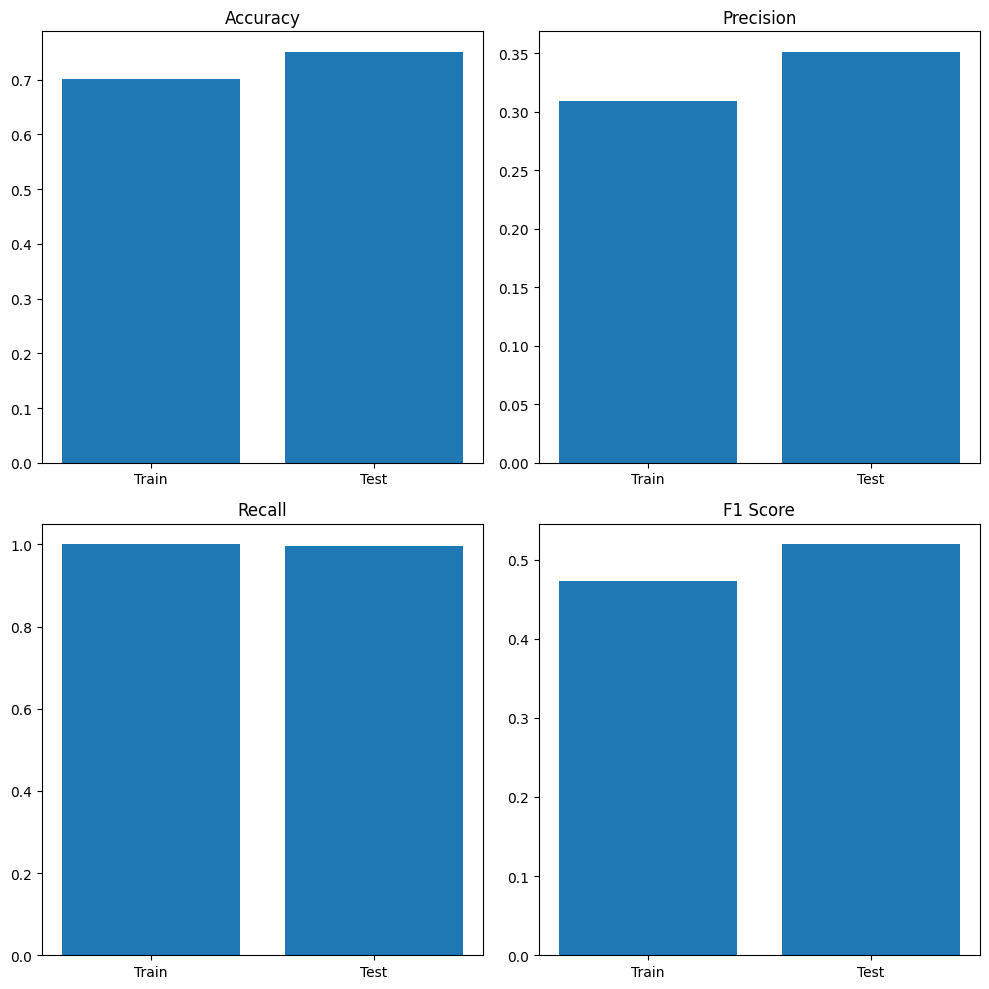

In [135]:
def plot_properties(result_train, result_test):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))

    axs[0, 0].bar(['Train', 'Test'], [result_train['accuracy'], result_test['accuracy']])
    axs[0, 0].set_title('Accuracy')

    axs[0, 1].bar(['Train', 'Test'], [result_train['precision'], result_test['precision']])
    axs[0, 1].set_title('Precision')

    axs[1, 0].bar(['Train', 'Test'], [result_train['recall'], result_test['recall']])
    axs[1, 0].set_title('Recall')

    axs[1, 1].bar(['Train', 'Test'], [result_train['f1'], result_test['f1']])
    axs[1, 1].set_title('F1 Score')

    plt.tight_layout()
    plt.show()

result_train = properties(nb, train)
result_test = properties(nb, test)
plot_properties(result_train, result_test)

## Zadanie 2 (15pt)

### Klasyfikator oparty na n-gramach MNB

#### Cel:
Zbudować klasyfikator spamu, wykorzystując n-gramy w połączeniu MNB, aby poprawić skuteczność klasyficji wiadomości e-mail.

#### Opis:
1. Zbierz zbiór danych zawierający etykiety (spam/nie-spam) oraz treść wiadomości e-mail np. [Enron-Spam](http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/index.html) lub [SMS Spam Collection](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) lub [E-mail Spam](https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv) lub ...
2. Przygotuj dane poprzez tworzenie n-gramów z treści wiadomości e-mail tzn. unigramy, bigramy, trigramy.
3. Zaimplementuj MNB, który będzie w stanie klasyfikować wiadomości jako spam lub nie-spam, wykorzystując n-gramy jako cechy.
4. Podziel dane na zbiór treningowy i testowy (np. 70% do treningu, 30% do testu).
5. Wytrenuj klasyfikator MNB na danych treningowych, wykorzystując n-gramy jako cechy.
6. Przetestuj klasyfikator na danych testowych i oceniaj jego skuteczność przy użyciu metryk: [precision i recall](https://en.wikipedia.org/wiki/Precision_and_recall), [f1-score](https://en.wikipedia.org/wiki/F-score) oraz [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision).
7. Dokonaj analizy wyników i porównaj je z wynikami klasyfikatora opartego na słowach.
8. Przedstaw wnioski dotyczące skuteczności klasyfikatora opartego na n-gramach oraz wpływu różnych typów n-gramów na skuteczność klasyfikacji.



In [136]:
from sklearn.feature_extraction.text import CountVectorizer

In [137]:
def get_n_grams(df, n):
    vectorizer = CountVectorizer(ngram_range=(1,n))
    X = vectorizer.fit_transform(df['text'])
    return vectorizer, X

vectorizer, X = get_n_grams(sms_df, 2)
vectorizer.get_feature_names_out()

array(['aa', 'aa and', 'aah', ..., 'zs subscription', 'zyada',
       'zyada kisi'], dtype=object)

In [138]:
class MultinomialNaiveBayes:
    def __init__(self, gram_len, alpha=1):
        self.class_probs = {}
        self.cond_probs = {}
        self.n = gram_len
        self.alpha = alpha

    def train(self, df):
        self.class_probs = { 
            'ham': sum(df['label'] == 'ham') / len(df),
            'spam': sum(df['label'] == 'spam') / len(df)
        }

        self.vectorizer, X = get_n_grams(df, self.n)
        feature_names = self.vectorizer.get_feature_names_out()
        m = len(feature_names)

        N_c_ham = sum(X[df['label'] == 'ham'].toarray().ravel())
        N_c_spam = sum(X[df['label'] == 'spam'].toarray().ravel())

        for token in feature_names:
            token_idx = np.where(feature_names == token)[0][0]
            N_tc_ham = X[df['label'] == 'ham', token_idx].sum()
            N_tc_spam = X[df['label'] == 'spam', token_idx].sum()

            self.cond_probs[token] = {
                'ham': (self.alpha + N_tc_ham) / (self.alpha * m + N_c_ham),
                'spam': (self.alpha + N_tc_spam) / (self.alpha * m + N_c_spam)
            }

    def predict(self, message):
        X = self.vectorizer.transform([message])
        feature_names = self.vectorizer.get_feature_names_out()

        # to avoid floating point underflow use log
        ham_prob = np.log(self.class_probs['ham'])
        spam_prob = np.log(self.class_probs['spam'])

        for token_idx in X.indices:
            token = feature_names[token_idx]
            for token in self.cond_probs:
                ham_prob += np.log(self.cond_probs[token]['ham'])
                spam_prob += np.log(self.cond_probs[token]['spam'])
        
        if spam_prob > ham_prob:
            return 'spam'
        else:
            return 'ham'

In [139]:
mask = np.random.rand(len(sms_df)) < 0.7
train = sms_df[mask]
test = sms_df[~mask]

nb = MultinomialNaiveBayes(2)
nb.train(train)

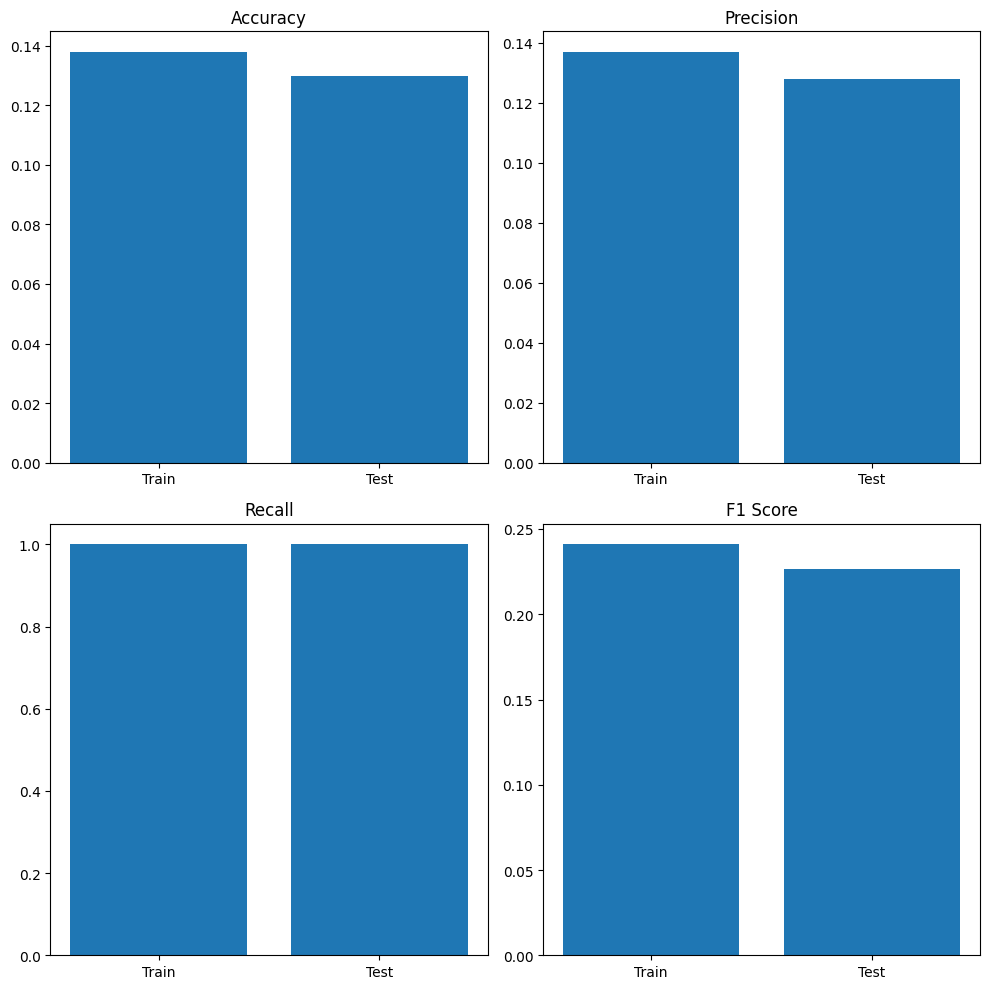

In [140]:
result_train = properties(nb, train)
result_test = properties(nb, test)
plot_properties(result_train, result_test)